# Navigation Task V2

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition
from custom_env.navigation_task import NavigationTaskV2
%matplotlib inline

path exception


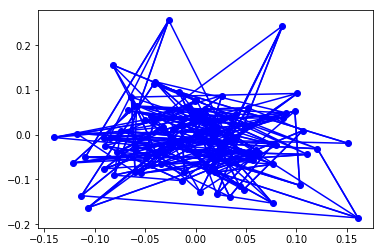

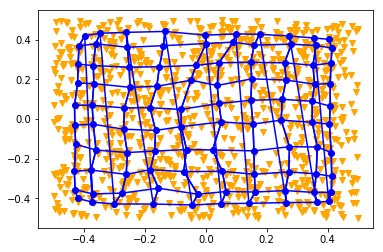

tensor([[-0.4210, -0.4003],
        [-0.4293, -0.3561],
        [-0.4317, -0.2641],
        [-0.4274, -0.1279],
        [-0.4302, -0.0305],
        [-0.4310,  0.0701],
        [-0.4209,  0.1814],
        [-0.4190,  0.2762],
        [-0.4168,  0.3682],
        [-0.3975,  0.4201],
        [-0.3735, -0.4190],
        [-0.3717, -0.3778],
        [-0.3771, -0.2573],
        [-0.3605, -0.1566],
        [-0.3694, -0.0269],
        [-0.3732,  0.0688],
        [-0.3675,  0.1783],
        [-0.3695,  0.2696],
        [-0.3614,  0.3794],
        [-0.3474,  0.4323],
        [-0.3004, -0.4286],
        [-0.2757, -0.3739],
        [-0.2614, -0.2793],
        [-0.2575, -0.1692],
        [-0.2701, -0.0513],
        [-0.2671,  0.0558],
        [-0.2485,  0.1596],
        [-0.2519,  0.2610],
        [-0.2575,  0.3617],
        [-0.2616,  0.4369],
        [-0.1723, -0.4290],
        [-0.1554, -0.3492],
        [-0.1820, -0.2555],
        [-0.1678, -0.1616],
        [-0.1650, -0.0577],
        [-0.1833,  0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Manager Self Organizing Map

/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return torch.max(self.w[self.select_winner(x)][-self.worker_som.total_nodes:])[0]


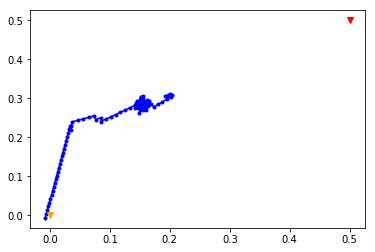

0 0.23151754775289976


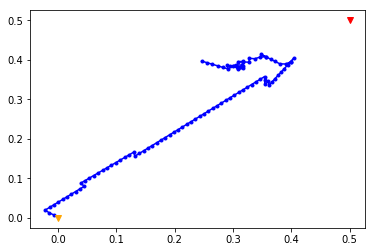

99 7.303615109159623


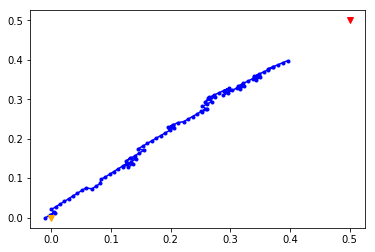

198 4.762831488257918


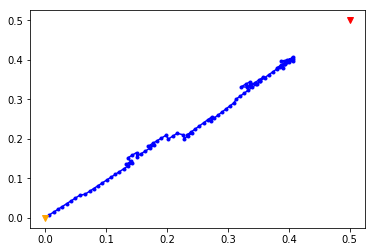

297 7.071380145939056


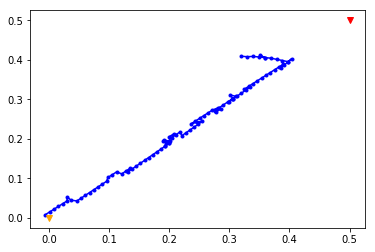

396 5.386961173813481


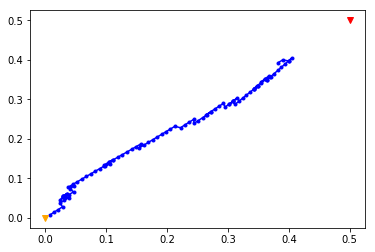

495 5.391387169005263


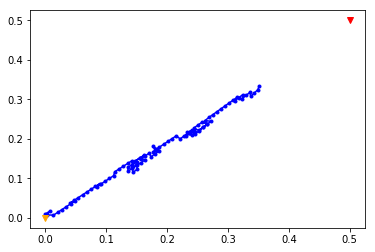

594 3.398899987271083


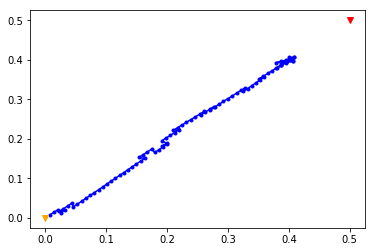

693 4.7680518505946745


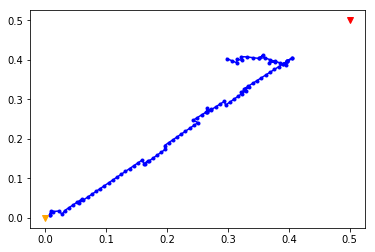

792 2.718931957155904


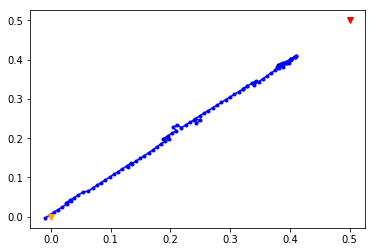

891 5.7857694720580835


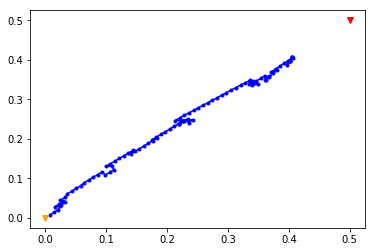

990 5.181623634478957


In [3]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskV2()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 99 == 0:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()

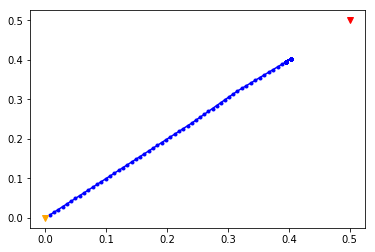

7.806832380294098


In [4]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()